### **Heart Disease Diagnostic Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### ELT PROCESS

In [2]:
#EXTRACT
from google.colab import files
uploaded = files.upload()

Saving Heart Disease data.csv to Heart Disease data.csv


In [3]:
#LOAD THE DATA
df = pd.read_csv("Heart Disease data.csv")

In [4]:
#TRANFORM
print(df.isnull().sum())
df.dropna(inplace=True)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'serum_cholesterol',
              'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
              'exercise_induced_angina', 'oldpeak', 'st_slope',
              'num_major_vessels', 'thal', 'heart_disease']

df['sex'] = df['sex'].replace({1: 'Male', 0: 'Female'})
df['chest_pain_type'] = df['chest_pain_type'].replace({0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-anginal Pain', 3: 'Asymptomatic'})
df['thal'] = df['thal'].replace({0: 'Normal', 1: 'Fixed Defect', 2: 'Reversible Defect'})

print(df.head())

   age     sex chest_pain_type  resting_blood_pressure  serum_cholesterol  \
0   52    Male  Typical Angina                     125                212   
1   53    Male  Typical Angina                     140                203   
2   70    Male  Typical Angina                     145                174   
3   61    Male  Typical Angina                     148                203   
4   62  Female  Typical Angina                     138                294   

   fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_induced_angina  \
0                    0            1             168                        0   
1                    1            0             155                        1   
2                    0            1             125                        1   
3                    0            1             161                        0   
4                    1            1             106                        0   

   oldpeak  st_slope  num_major_vessels               th

### KPIs Calculation

In [6]:
# 1. Heart Disease Rate
heart_disease_rate = df['heart_disease'].mean() * 100
print(f"Heart Disease Rate: {heart_disease_rate:.2f}%")

Heart Disease Rate: 51.32%


In [7]:
# 2. Heart Disease by Gender
heart_disease_by_gender = df.groupby('sex')['heart_disease'].mean() * 100
print(f"Heart Disease by Gender:\n{heart_disease_by_gender}")

Heart Disease by Gender:
sex
Female    72.435897
Male      42.075736
Name: heart_disease, dtype: float64


In [8]:
# 3. Average Resting Blood Pressure by Heart Disease
avg_blood_pressure = df.groupby('heart_disease')['resting_blood_pressure'].mean()
print(f"Average Resting Blood Pressure by Heart Disease:\n{avg_blood_pressure}")

Average Resting Blood Pressure by Heart Disease:
heart_disease
0    134.106212
1    129.245247
Name: resting_blood_pressure, dtype: float64


In [9]:
# 4. Average Cholesterol Level by Heart Disease
avg_cholesterol = df.groupby('heart_disease')['serum_cholesterol'].mean()
print(f"Average Cholesterol by Heart Disease:\n{avg_cholesterol}")

Average Cholesterol by Heart Disease:
heart_disease
0    251.292585
1    240.979087
Name: serum_cholesterol, dtype: float64


In [10]:
# 5. Exercise-Induced Angina Rate
angina_rate = df['exercise_induced_angina'].mean() * 100
print(f"Exercise-Induced Angina Rate: {angina_rate:.2f}%")

Exercise-Induced Angina Rate: 33.66%


### Exploratory Data Analysis (EDA) with Visualizations

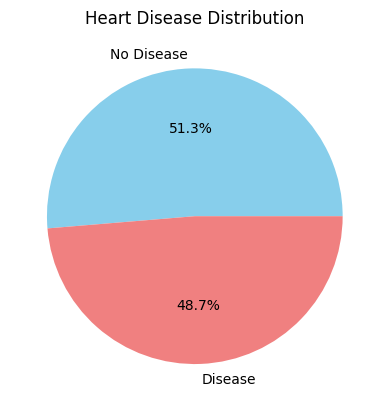

In [11]:
# Visualization 1: Pie Chart - Heart Disease Distribution
heart_disease_count = df['heart_disease'].value_counts()
plt.pie(heart_disease_count, labels=['No Disease', 'Disease'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Heart Disease Distribution')
plt.show()

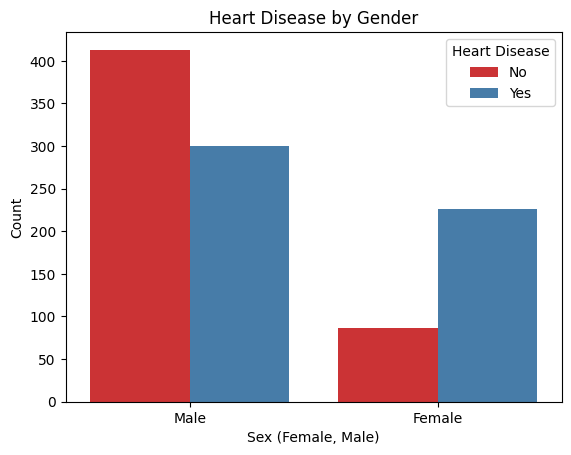

In [12]:
# Visualization 2: Bar Chart - Heart Disease by Gender
sns.countplot(x='sex', hue='heart_disease', data=df, palette='Set1')
plt.title('Heart Disease by Gender')
plt.xlabel('Sex (Female, Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

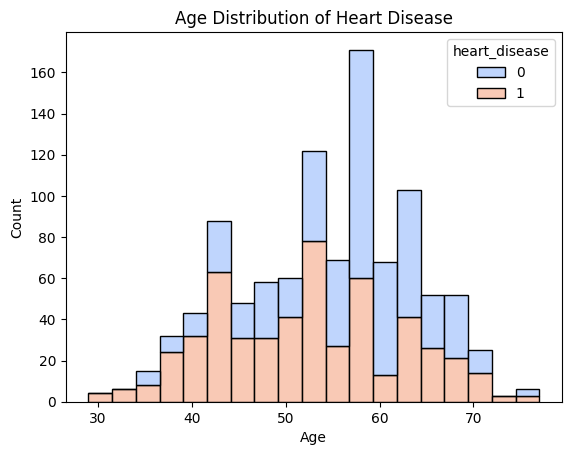

In [13]:
# Visualization 3: Age Distribution of Heart Disease (Histogram)
sns.histplot(data=df, x='age', hue='heart_disease', multiple='stack', palette='coolwarm')
plt.title('Age Distribution of Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<ipython-input-14-15b0a17e00e0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='heart_disease', y='resting_blood_pressure', data=df, palette='Set2')


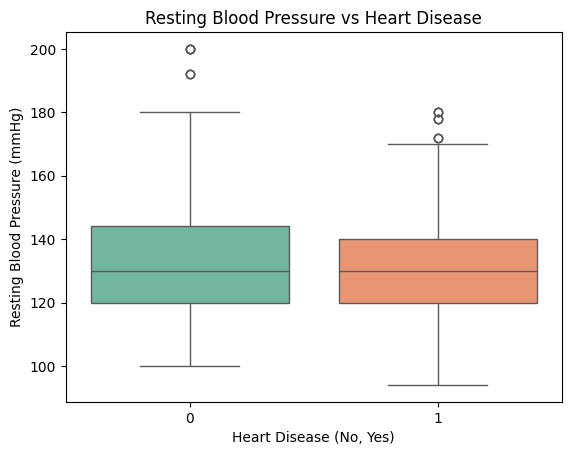

In [14]:
# Visualization 4: Box Plot - Resting Blood Pressure vs Heart Disease
sns.boxplot(x='heart_disease', y='resting_blood_pressure', data=df, palette='Set2')
plt.title('Resting Blood Pressure vs Heart Disease')
plt.xlabel('Heart Disease (No, Yes)')
plt.ylabel('Resting Blood Pressure (mmHg)')
plt.show()

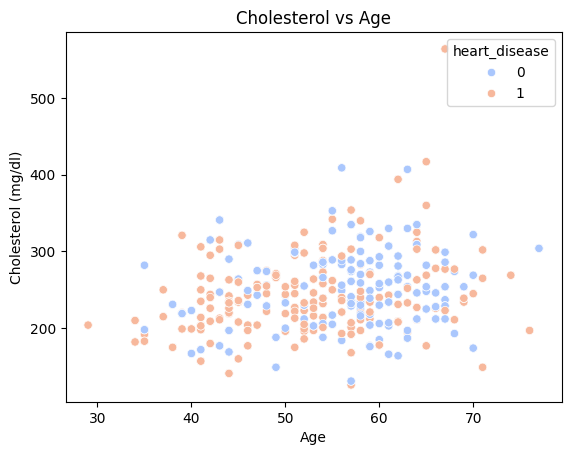

In [15]:
# Visualization 5: Scatter Plot - Cholesterol vs Age, colored by Heart Disease
sns.scatterplot(x='age', y='serum_cholesterol', hue='heart_disease', palette='coolwarm', data=df)
plt.title('Cholesterol vs Age')
plt.xlabel('Age')
plt.ylabel('Cholesterol (mg/dl)')
plt.show()

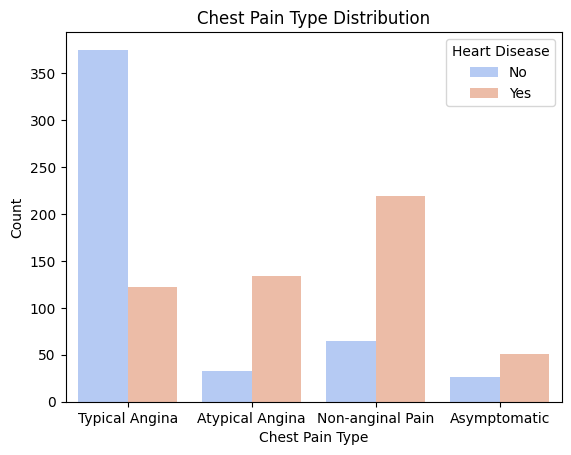

In [16]:
# Visualization 6: Bar Chart - Chest Pain Type Distribution by Heart Disease
sns.countplot(x='chest_pain_type', hue='heart_disease', data=df, palette='coolwarm')
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

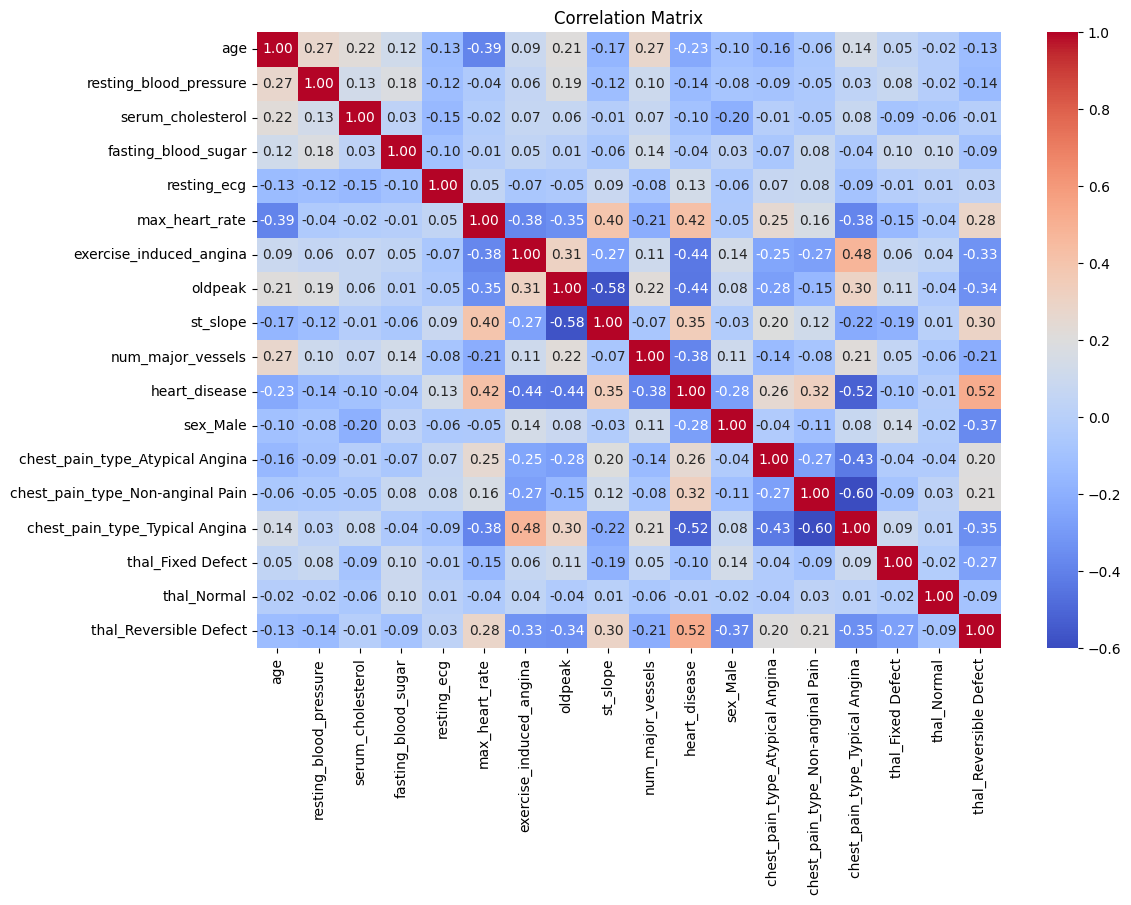

In [19]:
# Visualization 7: Correlation Heatmap
df_encoded = pd.get_dummies(df, columns=['sex', 'chest_pain_type', 'thal'], drop_first=True)
corr = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

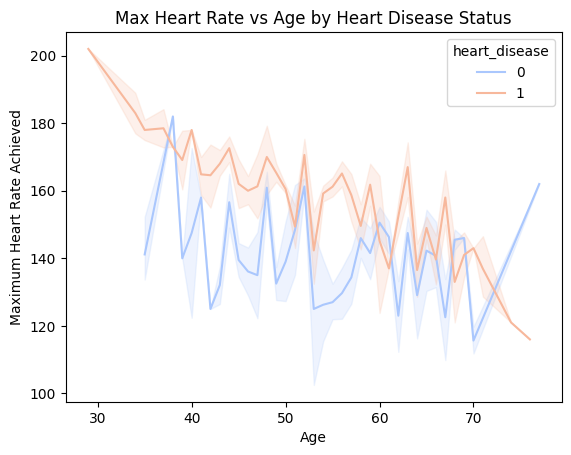

In [20]:
sns.lineplot(x='age', y='max_heart_rate', hue='heart_disease', palette='coolwarm', data=df)
plt.title('Max Heart Rate vs Age by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

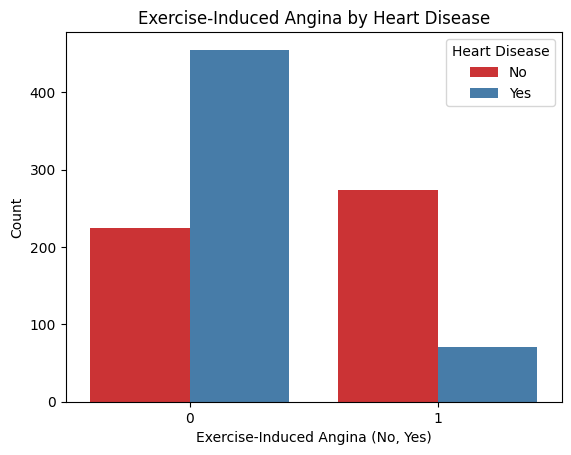

In [21]:
sns.countplot(x='exercise_induced_angina', hue='heart_disease', data=df, palette='Set1')
plt.title('Exercise-Induced Angina by Heart Disease')
plt.xlabel('Exercise-Induced Angina (No, Yes)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()